<a href="https://colab.research.google.com/github/jpcanamaque/codingdojo-project2/blob/master/Project2_CodingDojo_StudentEmployability_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Student Employability EDA
Authored by Johnroe Paulo Canamaque

## Part 1: Modules and Data Import

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

# Viz modules
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Fetch the data from the data source and assign to a data frame variable
student_employabity_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSfREKO_6wh1P_M5YKL_q8JLBTJGfJgb6ZT84JNnzjupsg4jKsIehdKqNk7wZ_8AA/pub?gid=465574278&single=true&output=csv'
se_df = pd.read_csv(student_employabity_url)
se_df.head(10)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable
5,Student 6,4,4,3,3,3,3,3,5,Employable
6,Student 7,4,4,4,3,3,3,3,3,Employable
7,Student 8,5,3,3,4,3,3,3,5,Employable
8,Student 9,4,4,4,4,4,4,4,5,Employable
9,Student 10,4,4,3,4,3,4,4,5,Employable


## Part 2: Data Cleansing
### Overview
- There are 2982 rows and 10 columns
- Columns are in right data type, renamed for easier access
- Removed irrelevant columns
- No duplicates, nulls, and outliers

In [3]:
# Getting the shape of the dataframe to determine row and column count
se_df.shape

# There are 2982 rows and 10 columns for this dataframe

(2982, 10)

In [4]:
# Checking the data types of each columns, and from here, try to set the right
# data type for the columns

se_df.dtypes

Name of Student               object
GENERAL APPEARANCE             int64
MANNER OF SPEAKING             int64
PHYSICAL CONDITION             int64
MENTAL ALERTNESS               int64
SELF-CONFIDENCE                int64
ABILITY TO PRESENT IDEAS       int64
COMMUNICATION SKILLS           int64
Student Performance Rating     int64
CLASS                         object
dtype: object

In [5]:
# Renaming columns for easier access
# For uniformity, change all column headers to lower_case
se_df.columns = se_df.columns.str.lower().str.replace(" ", "_")

In [6]:
# In this part, we will check if we have values that are not standardized
# For this, we will check for each columns and check for the values generated
for col in se_df.columns:
  display(f"Check for column {col}: ")
  display(se_df[col].value_counts())
  display("=============================")

'Check for column name_of_student: '

Student 1       1
Student 2002    1
Student 1992    1
Student 1994    1
Student 1995    1
               ..
Student 997     1
Student 998     1
Student 999     1
Student 1000    1
Student 3000    1
Name: name_of_student, Length: 2982, dtype: int64

'============================='

'Check for column general_appearance: '

4    1476
5    1129
3     361
2      16
Name: general_appearance, dtype: int64

'============================='

'Check for column manner_of_speaking: '

4    1378
3     902
5     654
2      48
Name: manner_of_speaking, dtype: int64

'============================='

'Check for column physical_condition: '

4    1425
3     772
5     753
2      32
Name: physical_condition, dtype: int64

'============================='

'Check for column mental_alertness: '

4    1353
5     792
3     771
2      66
Name: mental_alertness, dtype: int64

'============================='

'Check for column self-confidence: '

4    1113
3    1018
5     818
2      33
Name: self-confidence, dtype: int64

'============================='

'Check for column ability_to_present_ideas: '

4    1495
3     898
5     507
2      82
Name: ability_to_present_ideas, dtype: int64

'============================='

'Check for column communication_skills: '

3    1376
4    1153
5     289
2     164
Name: communication_skills, dtype: int64

'============================='

'Check for column student_performance_rating: '

5    2182
4     439
3     361
Name: student_performance_rating, dtype: int64

'============================='

'Check for column class: '

Employable        1729
LessEmployable    1253
Name: class, dtype: int64

'============================='

After checking the data, we see that the `name_of_student` will is just an identifier for each row, will not affect the total behavior of the data regardless of availability. In this case, we will remove the columns.

We need to remove duplicate values in order to ensure the quality of the data
And to prevent it from messing up with out future calculations

In [7]:
# Check for duplicates
len(se_df[se_df.duplicated() == True])

# Since there are no duplicate values, we can proceed with the next steps
se_df[se_df.duplicated()]

,name_of_student,general_appearance,manner_of_speaking,physical_condition,mental_alertness,self-confidence,ability_to_present_ideas,communication_skills,student_performance_rating,class


In [8]:
# Removing the Name of Student columns
se_df.drop(columns='name_of_student', inplace=True)

As for the `class` column, we are going to replace the value with its numerical equivalent

In [9]:
class_mapping = {'Employable':1, 'LessEmployable':0}
se_df.replace({'class':class_mapping}, inplace=True)

In [10]:
# Initial Checking for NA values

se_df.isna().any()

general_appearance            False
manner_of_speaking            False
physical_condition            False
mental_alertness              False
self-confidence               False
ability_to_present_ideas      False
communication_skills          False
student_performance_rating    False
class                         False
dtype: bool

Since the data is complete, there will be no need to impute the missing data

In [11]:
# Doing some final check to all the columns in the dataframe by doing some
# stat work

se_df.describe().T

,count,mean,std,min,25%,50%,75%,max
general_appearance,2982.0,4.246814,0.678501,2.0,4.0,4.0,5.0,5.0
manner_of_speaking,2982.0,3.884641,0.757013,2.0,3.0,4.0,4.0,5.0
physical_condition,2982.0,3.972166,0.744135,2.0,3.0,4.0,5.0,5.0
mental_alertness,2982.0,3.962777,0.781982,2.0,3.0,4.0,5.0,5.0
self-confidence,2982.0,3.910798,0.807602,2.0,3.0,4.0,5.0,5.0
ability_to_present_ideas,2982.0,3.813883,0.739390,2.0,3.0,4.0,4.0,5.0
communication_skills,2982.0,3.525486,0.743881,2.0,3.0,3.0,4.0,5.0
student_performance_rating,2982.0,4.610664,0.692845,3.0,4.0,5.0,5.0,5.0
class,2982.0,0.579812,0.493672,0.0,0.0,1.0,1.0,1.0


In [12]:
# Final view of the cleaned data

se_df.head()

,general_appearance,manner_of_speaking,physical_condition,mental_alertness,self-confidence,ability_to_present_ideas,communication_skills,student_performance_rating,class
0,4,5,4,5,5,5,5,5,1
1,4,4,4,4,4,4,3,5,1
2,4,3,3,3,3,3,2,5,0
3,3,3,3,2,3,3,3,5,0
4,4,4,3,3,4,4,3,5,1


## Part 3: Exploratory Data Analysis

In [13]:
# Checking for the characteristics of our data
# Let us first determine our data types to group them into Categorical and Numerical
se_df.dtypes

general_appearance            int64
manner_of_speaking            int64
physical_condition            int64
mental_alertness              int64
self-confidence               int64
ability_to_present_ideas      int64
communication_skills          int64
student_performance_rating    int64
class                         int64
dtype: object

As seen above, we can group the Categorical data by grouping string values, and we can categorize numerical data from the data by grouping number values

Below will be the new data frames based on their groupings

In [14]:
# Grouping categorical data
se_cat_data_df = se_df.select_dtypes(include=object)

# Grouping numerical data
se_num_data_df = se_df.select_dtypes(include='number')

# Display the columns per category
print('Categorical Columns: ', se_cat_data_df.columns, '\n\n')
print('Numerical Columns: ', se_num_data_df.columns)

Categorical Columns:  Index([], dtype='object') 


Numerical Columns:  Index(['general_appearance', 'manner_of_speaking', 'physical_condition',
       'mental_alertness', 'self-confidence', 'ability_to_present_ideas',
       'communication_skills', 'student_performance_rating', 'class'],
      dtype='object')


Most of the data are in numerical format. This is good because it well be easier to scale the data since we will not worry about encoding

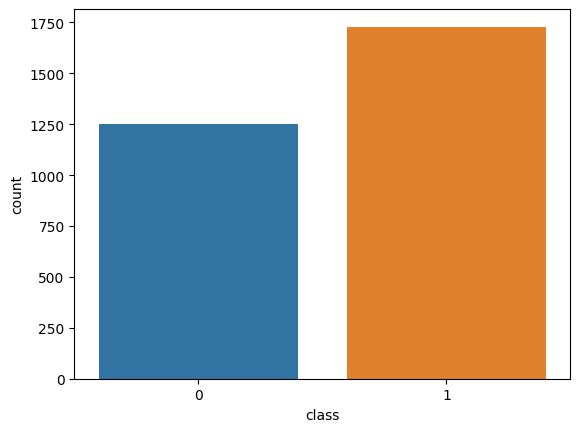

In [15]:
# Checking for the distribution of the class
sns.countplot(se_num_data_df, x='class');

In [16]:
se_df.isna().any()

general_appearance            False
manner_of_speaking            False
physical_condition            False
mental_alertness              False
self-confidence               False
ability_to_present_ideas      False
communication_skills          False
student_performance_rating    False
class                         False
dtype: bool

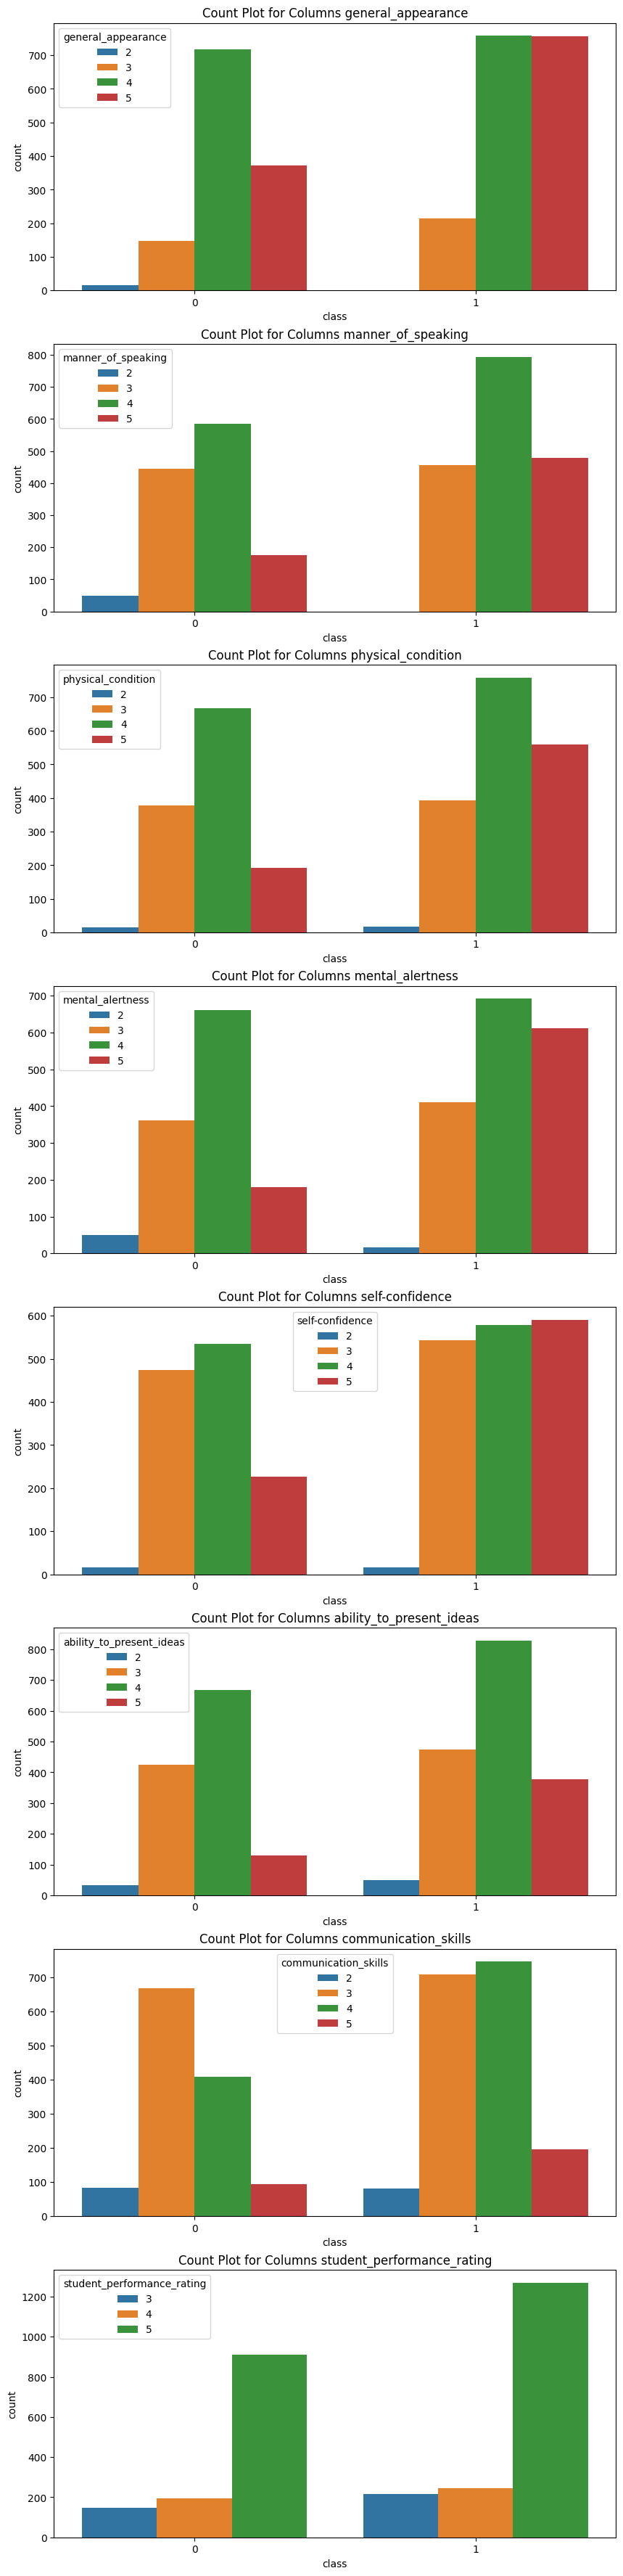

In [17]:
# Checking each of the distribution of score for very index

cols = list(se_df.drop(columns='class').columns)

fig, ax = plt.subplots(8, 1, figsize=(10,45))

for idx, col in enumerate(cols):
  sns.countplot(data=se_df, x='class', ax=ax[idx], hue=col)
  ax[idx].set_title(f'Count Plot for Columns {col}')


From the graph above, the data suggests the following
- Most of the columns have the mode for all students regardless of class.
- Majority of employable students have a scored 5 in Self Confidence, while majority of the non-employable students scored 4.
- Majority of employable students have a scored 4 in Communication Skills, while majority of the non-employable students scored 3.

Now let us identify the distribution of scores across employable and less employable students. For this case, we need to get the student's overall average score across all criteria.

We will create a histogram to better visualize this.

In [18]:
# Getting the average scores per student

# For employable
employable_average_scores = pd.DataFrame({
    'avg': se_df[se_df['class'] == 1].drop(columns='class')._get_numeric_data().mean(axis = 1)
})

# For less employable
unemployable_average_scores = pd.DataFrame({
    'avg': se_df[se_df['class'] == 0].drop(columns='class')._get_numeric_data().mean(axis = 1)
})

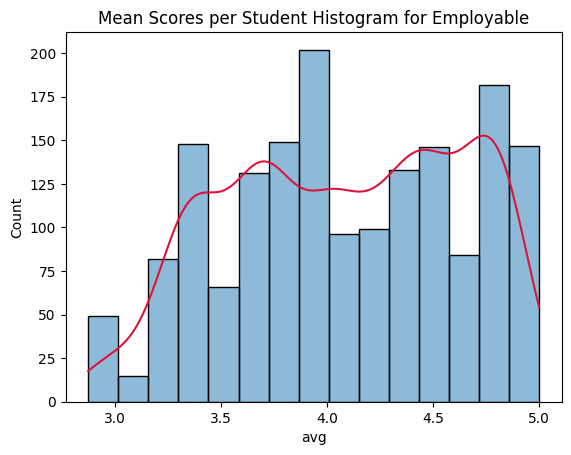

In [19]:
# Plotting average score distribution of unemployable students
ax = sns.histplot(employable_average_scores, x="avg", kde=True);
ax.lines[0].set_color('crimson')

plt.title('Mean Scores per Student Histogram for Employable')
plt.show()

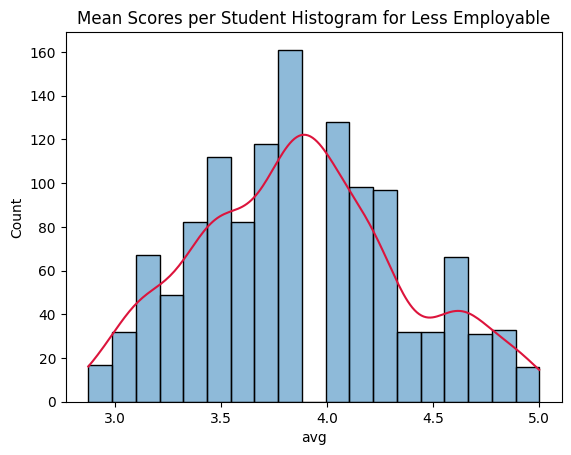

In [20]:
# Plotting average score distribution of less unemployable students
ax = sns.histplot(unemployable_average_scores, x="avg", kde=True);
ax.lines[0].set_color('crimson')

plt.title('Mean Scores per Student Histogram for Less Employable')
plt.show()

From the histograms above, the data suggests that:
- Less Employable distribution is normally distributed
- Employable distribution is negatively skewed


As we have seen in our count plot, the Self Confidence and the Communication Skills is where the variance is seen across our class. To better understand those criteria, let us try to find their distribution across the dataset

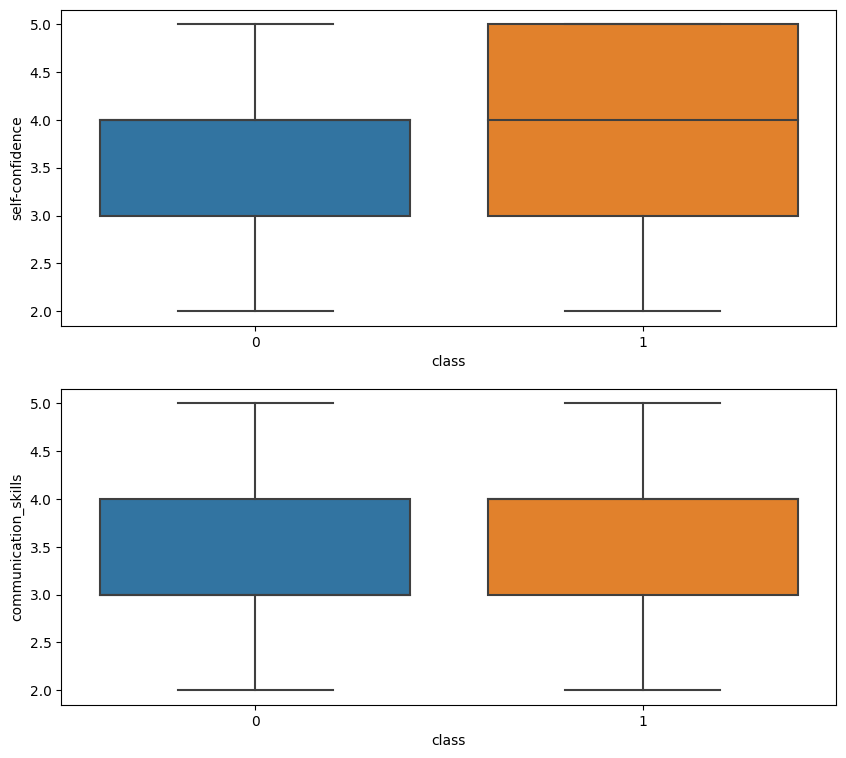

In [21]:
cp_se_df = se_df.copy()

plt.figure(figsize = (10,5))

plt.subplot(211)
sns.boxplot(data = cp_se_df, x= 'class', y = 'self-confidence');

plt.subplot(212)
sns.boxplot(data = cp_se_df, x = 'class', y = 'communication_skills');

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 1.5);

Based on the graph above:
- The median score of self confidence among employable students is the same with the 95th percentile of the less employable students. Meaning that most students has a high likelihood of being employable.
- Communication skills has the same distribution across classes.
- There are no observed outliers in the dataset

Let us now check the correlation across all the variables in the dataset. To achieve this, we will create a heatmap.

,general_appearance,manner_of_speaking,physical_condition,mental_alertness,self-confidence,ability_to_present_ideas,communication_skills,student_performance_rating,class
general_appearance,1.000000,0.389693,0.477484,0.512678,0.493303,0.410879,0.396693,-0.081690,0.121237
manner_of_speaking,0.389693,1.000000,0.555549,0.624248,0.542319,0.748702,0.634644,0.104616,0.187373
physical_condition,0.477484,0.555549,1.000000,0.649015,0.663982,0.574202,0.531213,0.050426,0.166728
mental_alertness,0.512678,0.624248,0.649015,1.000000,0.672420,0.657428,0.630417,0.095260,0.198860
self-confidence,0.493303,0.542319,0.663982,0.672420,1.000000,0.572639,0.577324,-0.045797,0.139421
ability_to_present_ideas,0.410879,0.748702,0.574202,0.657428,0.572639,1.000000,0.653187,0.218973,0.118289
communication_skills,0.396693,0.634644,0.531213,0.630417,0.577324,0.653187,1.000000,0.076036,0.139287
student_performance_rating,-0.081690,0.104616,0.050426,0.095260,-0.045797,0.218973,0.076036,1.000000,0.004146
class,0.121237,0.187373,0.166728,0.198860,0.139421,0.118289,0.139287,0.004146,1.000000


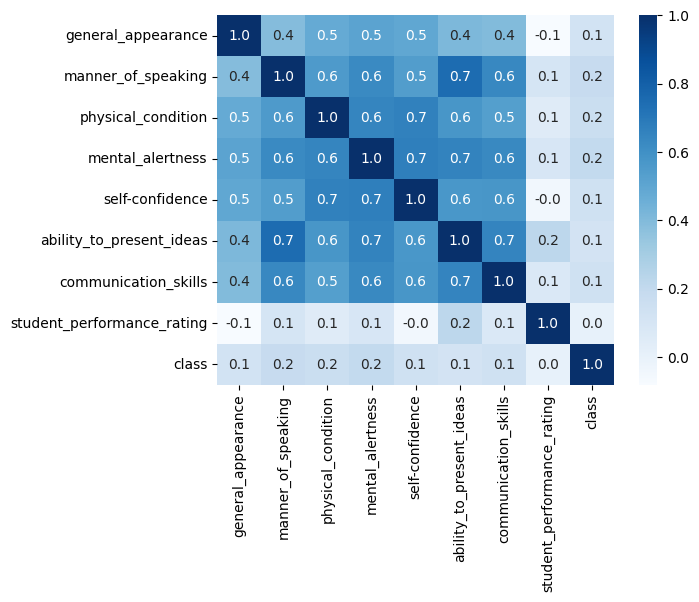

In [22]:
# Finding the correlation using heatmap
corr = se_df.corr(numeric_only=True, method='spearman')
display(corr);
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt=".1f");

In [23]:
se_df.columns

Index(['general_appearance', 'manner_of_speaking', 'physical_condition',
       'mental_alertness', 'self-confidence', 'ability_to_present_ideas',
       'communication_skills', 'student_performance_rating', 'class'],
      dtype='object')

'general_appearance', 'manner_of_speaking', 'physical_condition',
       'mental_alertness', 'self-confidence', 'ability_to_present_ideas',
       'communication_skills',  'student_performance_rating', 'class'

From the graph above, the data suggests the following:
- Most of the columns, except the `student_performance_rating` and `class`, have a low to moderate correlation to one another.





## Part 4: Explanatory Data Analysis


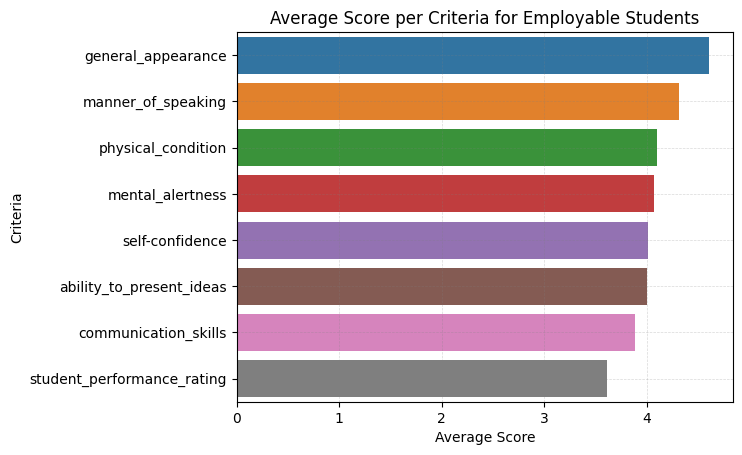

In [24]:
# Graph 1: Average Score per Criteria for Employable Students
emp = se_df[se_df['class'] == 1].drop(columns='class')

ave_skills = pd.DataFrame({
    'avg' : emp.mean()
})
ave_skills
sns.barplot(
    y = ave_skills.index,
    x= 'avg',
    data = ave_skills.sort_values('avg', ascending = False )
)

plt.title('Average Score per Criteria for Employable Students')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
plt.xlabel("Average Score")
plt.ylabel("Criteria");

plt.show();

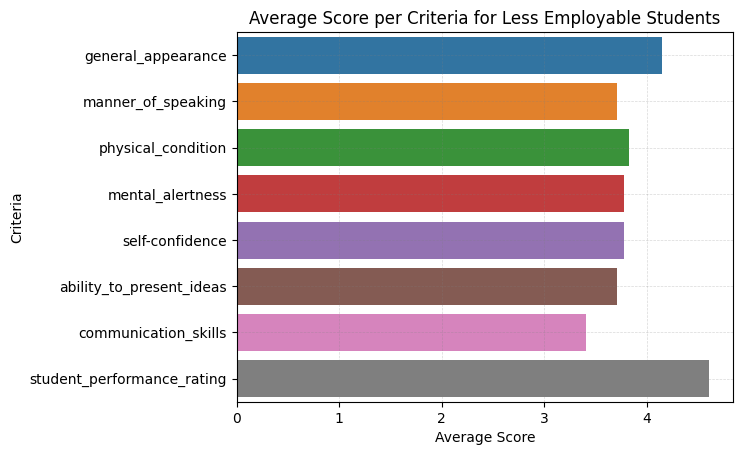

In [25]:
# Graph 2: Average Score per Criteria for Less Employable Students
less_emp = se_df[se_df['class'] == 0].drop(columns='class')

less_ave_skills = pd.DataFrame({
    'avg' : less_emp.mean()
})

sns.barplot(
    y = less_ave_skills.index,
    x= 'avg',
    data = less_ave_skills
)

plt.title('Average Score per Criteria for Less Employable Students')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
plt.xlabel("Average Score")
plt.ylabel("Criteria");

plt.show();